In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../train.csv")

# Drop unnecessary columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

# Check for duplicates in the DataFrame
duplicates = df.duplicated()
# Count the total number of duplicates
total_duplicates = duplicates.sum()

# Find all occurrences of duplicates in the DataFrame
all_duplicate_rows = df[df.duplicated(keep=False)]

# Remove duplicates from the DataFrame
df_cleaned = df.drop_duplicates()

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Convert boolean columns to integer
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

Epoch 1/100
2188/2188 [==============================] - 9s 3ms/step - loss: 0.7520 - accuracy: 0.6512 - val_loss: 0.7150 - val_accuracy: 0.6726
Epoch 2/100
2188/2188 [==============================] - 9s 4ms/step - loss: 0.7128 - accuracy: 0.6748 - val_loss: 0.7056 - val_accuracy: 0.6787
Epoch 3/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.7046 - accuracy: 0.6784 - val_loss: 0.7054 - val_accuracy: 0.6766
Epoch 4/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6986 - accuracy: 0.6840 - val_loss: 0.6989 - val_accuracy: 0.6834
Epoch 5/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6955 - accuracy: 0.6837 - val_loss: 0.6977 - val_accuracy: 0.6812
Epoch 6/100
2188/2188 [==============================] - 10s 5ms/step - loss: 0.6931 - accuracy: 0.6852 - val_loss: 0.6957 - val_accuracy: 0.6885
Epoch 7/100
2188/2188 [==============================] - 11s 5ms/step - loss: 0.6917 - accuracy: 0.6849 - val_loss: 0.6958 - val_

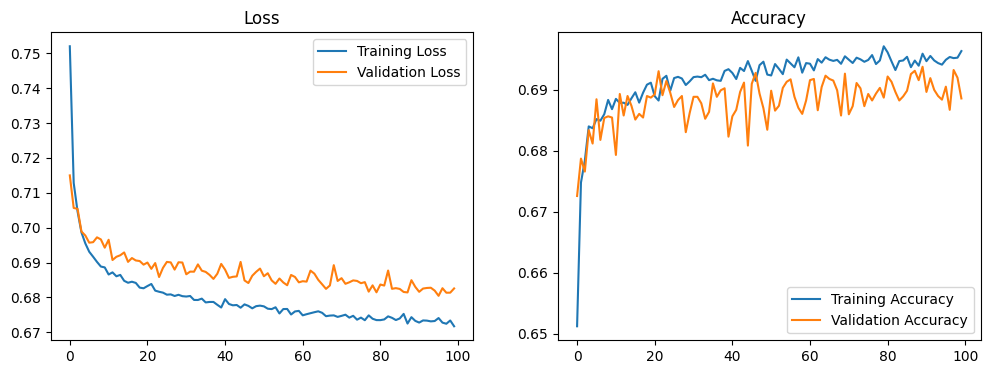

469/469 [==============================] - 1s 3ms/step - loss: 0.6734 - accuracy: 0.6895
Test Loss: 0.6734151244163513
Test Accuracy: 0.689466655254364


In [11]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record the history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

### Deep Dive into the Results

Let's analyze the provided plots and understand the performance of your neural network model in more detail.

#### Loss Plot

The left plot shows the loss on the training and validation sets over the 100 training epochs.

- **Training Loss**: The blue line represents the loss on the training set.
  - The training loss starts high and decreases steadily as the number of epochs increases. This pattern indicates that the model is learning and improving its performance on the training data.
  - The training loss shows a relatively smooth downward trend, suggesting the model is converging well without significant fluctuations.

- **Validation Loss**: The orange line represents the loss on the validation set.
  - The validation loss starts slightly higher and decreases initially, but it doesn't follow a smooth downward trend like the training loss. Instead, it fluctuates significantly.
  - These fluctuations indicate that the model's performance on the validation data is less stable, which could be due to several factors, such as small validation dataset size or inherent noise in the validation data.

#### Accuracy Plot

The right plot shows the accuracy on the training and validation sets over the 100 training epochs.

- **Training Accuracy**: The blue line represents the accuracy on the training set.
  - The training accuracy starts low and increases steadily over the epochs, reflecting that the model is successfully learning from the training data.
  - The training accuracy shows some fluctuations but generally trends upwards, indicating consistent improvement.

- **Validation Accuracy**: The orange line represents the accuracy on the validation set.
  - The validation accuracy also starts low but increases initially. However, it shows more variability compared to the training accuracy.
  - The fluctuations in validation accuracy suggest that the model's ability to generalize to unseen data is not entirely consistent. This behavior might be due to overfitting, where the model learns the training data too well, including its noise and outliers, but doesn't generalize well to the validation data.

### Interpretation and Recommendations

1. **Convergence and Overfitting**:
   - The training loss and accuracy show good convergence, indicating the model is learning effectively from the training data.
   - The fluctuating validation loss and accuracy suggest potential overfitting. The model might be capturing noise in the training data, which impacts its performance on the validation set.

2. **Validation Performance**:
   - To address the fluctuations in validation performance, consider the following:
     - **Regularization**: Increase the dropout rate or add other regularization techniques (e.g., L2 regularization) to reduce overfitting.
     - **Data Augmentation**: Augment the training data to improve the model's ability to generalize.
     - **Early Stopping**: Implement early stopping to halt training when the validation loss stops improving, preventing overfitting.

3. **Evaluation on Test Data**:
   - While the plots show the performance on training and validation sets, the final test evaluation metrics (`test_loss` and `test_accuracy`) provide a more realistic measure of the model's performance on completely unseen data.
   - Ensure the test dataset is representative of the real-world data the model will encounter.

### Conclusion

Overall, the model shows promising training performance but exhibits instability in validation performance, indicating potential overfitting. By applying regularization techniques, data augmentation, and early stopping, you can likely improve the model's generalization to unseen data. The final test evaluation will give a clearer picture of the model's real-world performance.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../train.csv")

# Drop unnecessary columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

# Check for duplicates in the DataFrame and remove them
df_cleaned = df.drop_duplicates()

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Convert boolean columns to integer
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df_cleaned[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

# Convert y to a single column with labels (0, 1, 2) representing Good, Poor, and Standard
y = y.idxmax(axis=1).map({'Credit_Score_Good': 0, 'Credit_Score_Poor': 1, 'Credit_Score_Standard': 2})

# One-hot encode the target variable
y = to_categorical(y, num_classes=3)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record the history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate predictions for the test set
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

# Plot confusion matrix for the test set
conf_matrix = confusion_matrix(y_test_true, y_test_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt

C:\Users\admin\AppData\Local\Temp\ipykernel_2020\4220231184.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])
C:\Users\admin\AppData\Local\Temp\ipykernel_2020\4220231184.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)


Epoch 1/100
2188/2188 [==============================] - 13s 5ms/step - loss: 0.7499 - accuracy: 0.6557 - val_loss: 0.7015 - val_accuracy: 0.6813
Epoch 2/100
2188/2188 [==============================] - 11s 5ms/step - loss: 0.7149 - accuracy: 0.6744 - val_loss: 0.6942 - val_accuracy: 0.6851
Epoch 3/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.7055 - accuracy: 0.6802 - val_loss: 0.6896 - val_accuracy: 0.6878
Epoch 4/100
2188/2188 [==============================] - 13s 6ms/step - loss: 0.7001 - accuracy: 0.6814 - val_loss: 0.6904 - val_accuracy: 0.6871
Epoch 5/100
2188/2188 [==============================] - 17s 8ms/step - loss: 0.6975 - accuracy: 0.6841 - val_loss: 0.6873 - val_accuracy: 0.6848
Epoch 6/100
2188/2188 [==============================] - 20s 9ms/step - loss: 0.6948 - accuracy: 0.6845 - val_loss: 0.6852 - val_accuracy: 0.6843
Epoch 7/100
2188/2188 [==============================] - 16s 7ms/step - loss: 0.6920 - accuracy: 0.6843 - val_loss: 0.6860 -

KeyboardInterrupt: 

C:\Users\admin\AppData\Local\Temp\ipykernel_2020\360454397.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])
C:\Users\admin\AppData\Local\Temp\ipykernel_2020\360454397.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)


Validation Accuracy: 0.758
Test Accuracy: 0.7532
              precision    recall  f1-score   support

        Good       0.69      0.71      0.70      2611
        Poor       0.75      0.75      0.75      4399
    Standard       0.78      0.77      0.77      7990

    accuracy                           0.75     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.75      0.75      0.75     15000



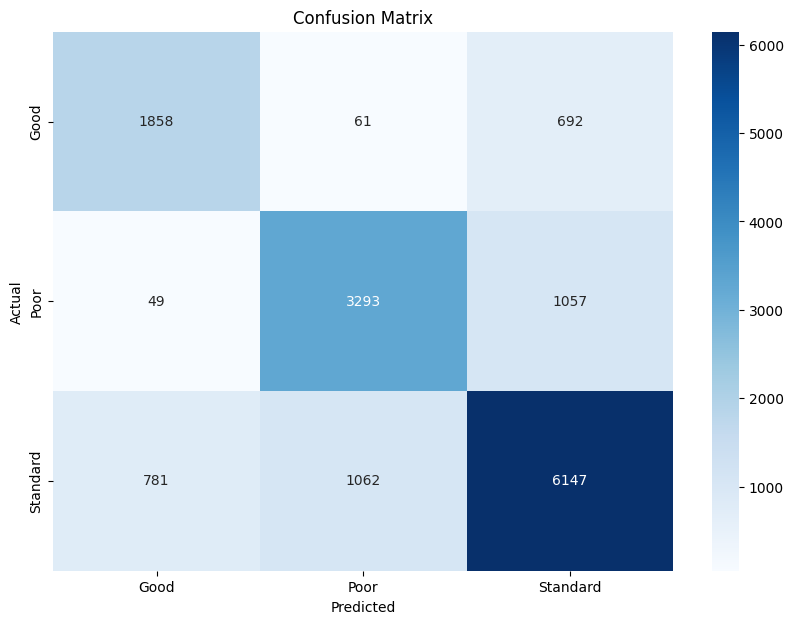

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../train.csv")

# Drop unnecessary columns
df = df.drop(columns=['ID', 'Customer_ID', 'Month', 'Age', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Utilization_Ratio'])

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Credit_Score', 'Credit_Mix'])

# Check for duplicates in the DataFrame and remove them
df_cleaned = df.drop_duplicates()

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = ["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Outstanding_Debt", "Credit_History_Age", 
                   "Monthly_Balance"]
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Convert boolean columns to integer
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard'])
y = df_cleaned[['Credit_Score_Good', 'Credit_Score_Poor', 'Credit_Score_Standard']]

# Convert y to a single column with labels (0, 1, 2) representing Good, Poor, and Standard
y = y.idxmax(axis=1).map({'Credit_Score_Good': 0, 'Credit_Score_Poor': 1, 'Credit_Score_Standard': 2})

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy}')

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

# Generate classification report
print(classification_report(y_test, test_predictions, target_names=['Good', 'Poor', 'Standard']))

# Plot confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()